# Proyek Analisis Data: Bike Sharing CSV
- **Nama:** Nanda Hasudungan simatupang
- **Email:** nandasimatupang2002@gmail.com
- **ID Dicoding:** simatupangnanda

## Menentukan Pertanyaan Bisnis

- Pada musim apakah yang menunjukkan perentalan sepeda tertinggi
- Pada Bulan apakah yang menunjukkan perentalan sepeda tertinggi
- Apakah temperatur berpengaruh terhadap jumlah perentalan sepeda

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

    Data yang digunakan adalah data penyewaan sepeda sepanjangan tahun 2011 dan 2012, yang data jumlah sepeda yang dirental setiap harinya dan variabel-variabel yang diasumsikan berkaitan dengan jumlah rental sepeda pada hari itu

In [2]:
day_data=pd.read_csv("https://raw.githubusercontent.com/simatupangnanda/data_bangkit/main/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai Data Day

In [3]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


    Berdasarkan informasi diatas, dataset yang digunakan tidak memliki 730 record data, dan dan terdapat 15 variabel. Terlihat tidak terdapat missing value pada semua variabel. Meskipun begitu terdapat type data yang tidak sesuai yaitu variabel dteday yang seharusnya type datanya adalah datetime

In [4]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jumlah data duplikat pada data day adalah: ", day_data.duplicated().sum())

Jumlah data duplikat pada data day adalah:  0


tidak terdapat data yang terduplikasi sehingga bisa dilanjutkan dengan melihat statistika desktiptif dari setiap variabel

In [6]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


    Berdasarkan statistika deskriptf diatas, kita bisa menyimpulkan tidak terlihat ada data yang tidak akurat karena nilai dari setiap variabel masih sesuai dengan deskripsi dataset pada sumbernya. Tidak ada nilai yang terlalu kecil atau terlalu tinggi dibandingkan data normalnya,
   
    Tetapi untuk mempermudah visualisasi data, maka saya perlu mengubah nilai pada beberapa variabel seperti season dan yearmenjadi nilai normal.

### Cleaning Data

In [7]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])


day_data.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)


day_data.yr.replace((0,1), (2011,2012), inplace=True)

day_data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

    Pada tahap ini mengubah type data dteday menjadai datetime kemudian saya mengganti nilai dari variabel "yr" dan "season", dari yang awalnya angka menjadi data kategori

In [8]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,Jan,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,Jan,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,Jan,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,Jan,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,Dec,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Winter,2012,Dec,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Winter,2012,Dec,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Winter,2012,Dec,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Exploratory Data Analysis (EDA)

### Musim dengan total perental sepeda

In [9]:
cnt_by_season=pd.DataFrame(day_data.groupby(by="season").agg({
    "temp":"mean",
    "cnt": "sum"
}))

    Pada tahap ini saya menhitung total perentalan sepeda secara keseluruhan yang dikelompokkan berdasarkan musimnya. Kemudian disimpan ke dalam dataframe agar gampang divisualisasi nantinya

In [10]:
cnt_by_season

,temp,cnt
season,,
Fall,0.422906,841613
Spring,0.544405,918589
Summer,0.706309,1061129
Winter,0.297748,471348


In [11]:
cnt_by_month=pd.DataFrame(day_data.groupby(by="mnth").agg({
    "temp":"mean",
    "cnt": "sum",
}))

ordered_months = [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]
cnt_by_month = cnt_by_month.reindex(ordered_months, fill_value=0)


Pada tahap ini saya menhitung total perentalan sepeda secara keseluruhan yang dikelompokkan berdasarkan bulan. Kemudian disimpan ke dalam dataframe agar gampang divisualisasi nantinya

In [12]:
cnt_by_month

,temp,cnt
mnth,,
Jan,0.236444,134933
Feb,0.299226,151352
Mar,0.390539,228920
Apr,0.469999,269094
May,0.594798,331686
Jun,0.684097,346342
Jul,0.755470,344948
Aug,0.708582,351194
Sep,0.616485,345991


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apakah yang menunjukkan perentalan sepeda tertinggi

    Saya menggunakan seaborn untuk membuat visualisasi barplot untuk menjawab pertanyaan pertama, dan didapatkan bahwa summer merupakan musim dengan jumalah perentalan terbanyak

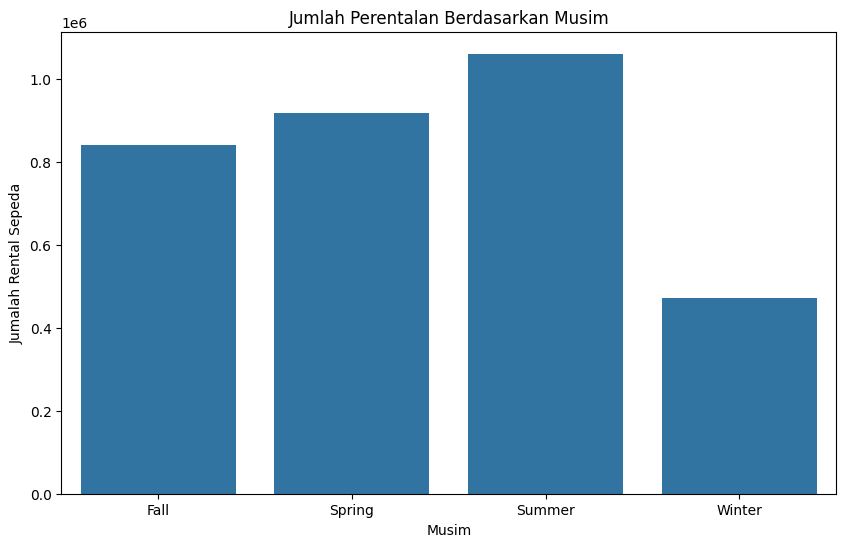

In [13]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='cnt', data=cnt_by_season)

plt.xlabel("Musim")
plt.ylabel("Jumalah Rental Sepeda")
plt.title("Jumlah Perentalan Berdasarkan Musim")

plt.show()

### Pertanyaan 2: Pada Bulan apakah yang menunjukkan perentalan sepeda tertinggi

    Saya menggunakan seaborn untuk membuat visualisasi histogram untuk menjawab pertanyaan kedua, dan didapatkan bahwa bulan agustus merupakan bulan dengan jumalah perentalan terbanyak, tidak berbeda jauh dnegan bulan-bulan di sekitarnya

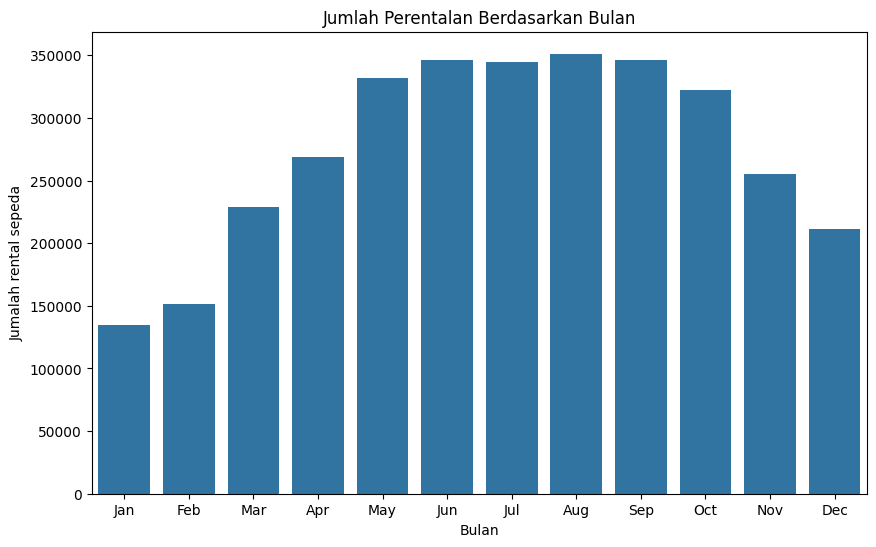

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=cnt_by_month)
plt.xlabel("Bulan") 
plt.ylabel("Jumalah rental sepeda")
plt.title("Jumlah Perentalan Berdasarkan Bulan")

plt.show()



### Pertanyaan 3: Aapakah temperatur berpengaruh terhadap jumlah perentalan sepeda

    Saya menggunakan seaborn untuk membuat visualisasi lineplot untuk menjawab pertanyaan ketiga, dan suhu berpengaruh positif terhadap jumlah perentalan sepeda, karena peningkatan temperatur sejalan/linear dengan dengan meningkatnya perentalan sepeda 

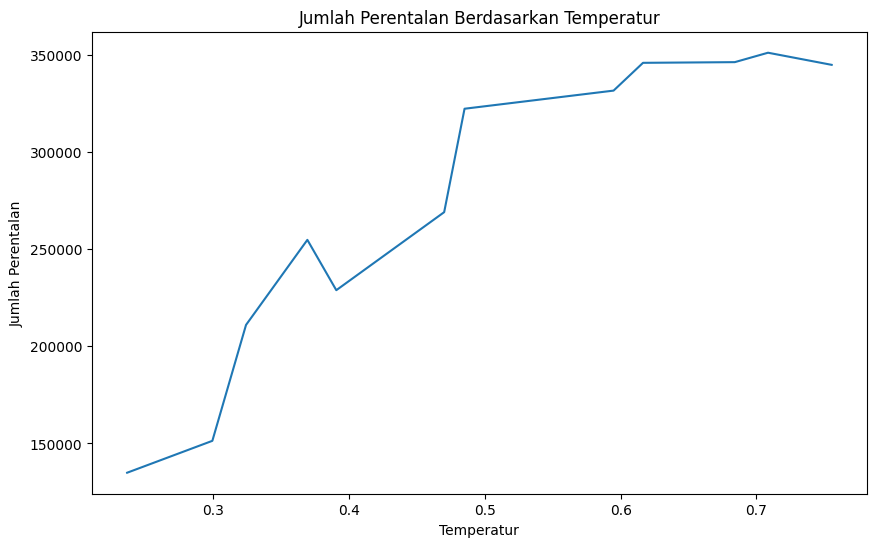

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='temp', y='cnt', data=cnt_by_month)
plt.xlabel("Temperatur") 
plt.ylabel("Jumlah Perentalan")
plt.title("Jumlah Perentalan Berdasarkan Temperatur")

plt.show()

## Conclusion

- Conclusion pertanyaan 1
  
Berdasarkan hasil dari exploratory data analysis didapatkan bahwa musim summer merupakan musim dimana jumlah perentalan sepdeda terbanyak dibandingkan dengan musim musim lainnya
  
- Conclusion pertanyaan 2

Berdasarkan hasil dari exploratory data analysis didapatkan bahwa bulan Agustus merupakan merupakan bulan dimana jumlah perentalan sepdeda terbanyak, berbeda sedikit dengan bulan-bulan didekatnya, hal ini sejalan dengan kesimpulan pada pertanyaan pertama karena bulan agustus merupakan musim summer

- conclusion pertanyaan 3

Dari kedua kesimpulan diatas, membuat kita bertanya kenapa pada bulan atau musim tertentu perentalan sepeda melonjak, hal ini membawa kita ke pertanyaan ketiga, temperatur memiliki hubungan yang positif dengan jumlah perentalan sepeda berdasarkan linechart rata-rata suhu dengan jumlah perentalan sepeda. Hal ini cukup masuk akal karean cuaca yang panas akan mendorong orang untuk beraktifitas diluar salah satunya dengan menggunakan sepeda, sebaliknya ketika temperatur dingin, sangat tidak nyaman untuk bepergian menggunakan sepeda

## Analisis Lanjutan

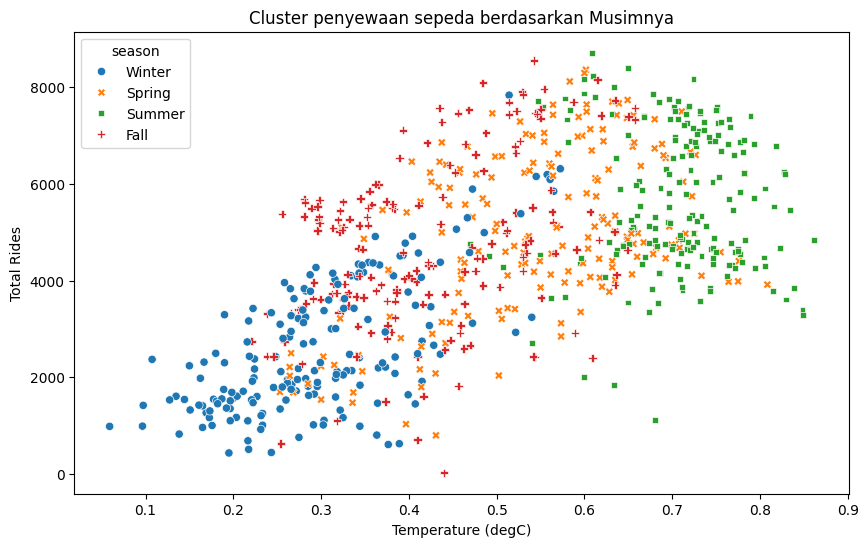

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data, hue='season',style='season')
plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Cluster penyewaan sepeda berdasarkan Musimnya")
plt.show()

    Bisa dilihat berdasarkan plot diatas bahwa cluster yang terbentuk cukup jelas berdasarkan musim yang digambarkan dengan warna dan karakter poin yang berbeda, data poin yang memiliki warna yang sama cenderung berkumpul dengan data sejenisnya, dari plot ini juga bisa dilihat hubungan positif antara suhu dengan total perentalan sepeda